In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

In [64]:
df = pd.read_csv('Mall_Customers.csv', delimiter = ',')
df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

In [65]:
dt_10kol = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [66]:
array_10kol = np.array(dt_10kol.values)
X = array_10kol

In [67]:
dt = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [68]:
# models = linkage(dt, method='complete',metric='euclidean')
# labels = cut_tree(models, n_clusters=5).reshape(-1, )

# # models = linkage(dt, method='single',metric='euclidean')
# # labels = cut_tree(models, n_clusters=2).reshape(-1, )

models = linkage(dt, method='average',metric='euclidean')
labels = cut_tree(models, n_clusters=7).reshape(-1, )

In [69]:
df2 = df

In [70]:
df2['Cluster_Id'] = labels + 1
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,1,19,15,39,1
1,2,1,21,15,81,2
2,3,0,20,16,6,1
3,4,0,23,16,77,2
4,5,0,31,17,40,1


In [71]:
df2['Cluster_Id'].value_counts()

3    79
4    36
5    34
1    23
2    21
6     4
7     3
Name: Cluster_Id, dtype: int64

In [77]:
cluster1=df2[df2['Cluster_Id']==1]
print('Daftar Customer', cluster1['CustomerID'].values)
print()
cluster2=df2[df2['Cluster_Id']==2]
print('Daftar Customer', cluster2['CustomerID'].values)
print()
cluster3=df2[df2['Cluster_Id']==3]
print('Daftar Customer', cluster3['CustomerID'].values)
print()
cluster4=df2[df2['Cluster_Id']==4]
print('Daftar Customer', cluster4['CustomerID'].values)
print()
cluster5=df2[df2['Cluster_Id']==5]
print('Daftar Customer', cluster5['CustomerID'].values)
print()
cluster6=df2[df2['Cluster_Id']==6]
print('Daftar Customer', cluster6['CustomerID'].values)
print()
cluster7=df2[df2['Cluster_Id']==7]
print('Daftar Customer', cluster7['CustomerID'].values)
print()


Daftar Customer [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

Daftar Customer [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]

Daftar Customer [ 44  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123]

Daftar Customer [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194]

Daftar Customer [125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159
 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191]

Daftar Customer [193 195 197 199]

Daftar Customer [196 198 200]



In [78]:
print(df2[['Annual Income (k$)','Spending Score (1-100)', 'Cluster_Id']].groupby('Cluster_Id').mean())

            Annual Income (k$)  Spending Score (1-100)
Cluster_Id                                            
1                    26.304348               20.913043
2                    25.095238               80.047619
3                    54.417722               50.215190
4                    83.111111               82.416667
5                    82.647059               18.764706
6                   124.000000               17.500000
7                   127.666667               78.666667


In [79]:
print(df2[['Annual Income (k$)','Spending Score (1-100)', 'Cluster_Id']].groupby('Cluster_Id').std())

            Annual Income (k$)  Spending Score (1-100)
Cluster_Id                                            
1                     7.893811               13.017167
2                     7.133756               10.249274
3                     8.558408                6.275044
4                    11.295455                9.640317
5                    10.099152               11.281679
6                    10.165300                8.225975
7                     8.621678                4.509250


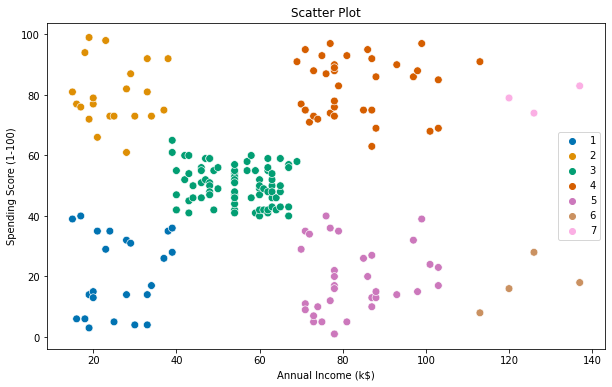

In [80]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue= labels + 1,  
                 palette='colorblind', legend='full',data = df2  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Scatter Plot')
plt.show()

In [81]:
print(len(cluster1) / 200 * 100)
print(len(cluster2) / 200 * 100)
print(len(cluster3) / 200 * 100)
print(len(cluster4) / 200 * 100)
print(len(cluster5) / 200 * 100)
print(len(cluster6) / 200 * 100)
print(len(cluster7) / 200 * 100)

11.5
10.5
39.5
18.0
17.0
2.0
1.5
